In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


In [122]:
df = pd.read_csv('Crime_Incidents_in_2024.csv')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21461 entries, 0 to 21460
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     21461 non-null  float64
 1   Y                     21461 non-null  float64
 2   CCN                   21461 non-null  int64  
 3   REPORT_DAT            21461 non-null  object 
 4   SHIFT                 21461 non-null  object 
 5   METHOD                21461 non-null  object 
 6   OFFENSE               21461 non-null  object 
 7   BLOCK                 21461 non-null  object 
 8   XBLOCK                21461 non-null  float64
 9   YBLOCK                21461 non-null  float64
 10  WARD                  21458 non-null  float64
 11  ANC                   21458 non-null  object 
 12  DISTRICT              21096 non-null  float64
 13  PSA                   21076 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  21458 non-null  object 
 15  BLOCK_GROUP        

In [124]:
df.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,401821.9354,133325.3901,24042662,2024/03/21 14:26:00+00,DAY,OTHERS,BURGLARY,1800 - 1899 BLOCK OF 18TH STREET SE,401821.935424,133325.390073,...,007605 2,7605.0,Precinct 112,38.867749,-76.979006,NaN,2024/03/21 11:55:00+00,2024/03/21 12:57:00+00,599969711,NaN
1,396326.1700,139306.4900,24124362,2024/08/14 04:48:00+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,2400 - 2499 BLOCK OF 18TH STREET NW,396326.170000,139306.490000,...,004002 1,4002.0,Precinct 25,38.921623,-77.042365,ADAMS MORGAN,2024/08/11 03:30:00+00,2024/08/14 04:43:00+00,599969720,NaN
2,401211.6000,138483.2400,24090303,2024/06/14 07:58:03+00,MIDNIGHT,OTHERS,THEFT F/AUTO,1300 - 1399 BLOCK OF OKIE STREET NE,401211.600000,138483.240000,...,008803 1,8803.0,Precinct 76,38.914214,-76.986030,NaN,2024/06/14 02:00:00+00,2024/06/14 06:00:00+00,599969731,NaN
3,400541.5000,139301.4000,24093316,2024/06/19 17:29:11+00,DAY,OTHERS,THEFT/OTHER,2300 - 2499 BLOCK OF WASHINGTON PLACE NE,400541.500000,139301.400000,...,009102 4,9102.0,Precinct 72,38.921585,-76.993756,NaN,2024/06/19 16:43:00+00,2024/06/19 17:10:00+00,599969732,NaN
4,398682.3000,134716.4900,24034913,2024/03/07 13:11:19+00,DAY,OTHERS,MOTOR VEHICLE THEFT,700 - 899 BLOCK OF 3RD STREET SW,398682.300000,134716.490000,...,010500 3,10500.0,Precinct 128,38.880281,-77.015187,SOUTHWEST,2024/03/07 10:55:00+00,2024/03/07 13:00:00+00,599969736,NaN


In [125]:
print(df.describe())

                   X              Y           CCN         XBLOCK  \
count   21461.000000   21461.000000  2.146100e+04   21461.000000   
mean   399350.025541  137741.193845  2.409739e+07  399350.025541   
std      3032.450162    3365.801960  1.720100e+05    3032.450162   
min    390362.150000  127300.240000  5.094764e+06  390362.150000   
25%    397229.120000  136105.440000  2.404192e+07  397229.120000   
50%    399081.140000  137835.010000  2.408564e+07  399081.140000   
75%    401289.670000  139712.740000  2.412497e+07  401289.670000   
max    407806.750900  147365.030000  2.503097e+07  407806.750917   

              YBLOCK          WARD      DISTRICT           PSA   CENSUS_TRACT  \
count   21461.000000  21458.000000  21096.000000  21076.000000   21451.000000   
mean   137741.193845      4.438997      3.735779    378.201224    7783.229080   
std      3365.801959      2.325984      1.854883    185.126626   37711.285015   
min    127300.240000      1.000000      1.000000    101.000000 

In [126]:
print(df.isnull().sum())

X                           0
Y                           0
CCN                         0
REPORT_DAT                  0
SHIFT                       0
METHOD                      0
OFFENSE                     0
BLOCK                       0
XBLOCK                      0
YBLOCK                      0
WARD                        3
ANC                         3
DISTRICT                  365
PSA                       385
NEIGHBORHOOD_CLUSTER        3
BLOCK_GROUP                10
CENSUS_TRACT               10
VOTING_PRECINCT             3
LATITUDE                    0
LONGITUDE                   0
BID                     17520
START_DATE                  3
END_DATE                 1564
OBJECTID                    0
OCTO_RECORD_ID          21461
dtype: int64


In [127]:
#drop the missing values
df.drop(columns="OCTO_RECORD_ID", inplace=True)

In [128]:
df.dropna(inplace=True)

In [129]:
print(df.isnull().sum())

X                       0
Y                       0
CCN                     0
REPORT_DAT              0
SHIFT                   0
METHOD                  0
OFFENSE                 0
BLOCK                   0
XBLOCK                  0
YBLOCK                  0
WARD                    0
ANC                     0
DISTRICT                0
PSA                     0
NEIGHBORHOOD_CLUSTER    0
BLOCK_GROUP             0
CENSUS_TRACT            0
VOTING_PRECINCT         0
LATITUDE                0
LONGITUDE               0
BID                     0
START_DATE              0
END_DATE                0
OBJECTID                0
dtype: int64


In [90]:
#check duplicates
print(df.duplicated().sum())

0


In [91]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [130]:
df.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID
1,396326.1700,139306.4900,24124362,2024/08/14 04:48:00+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,2400 - 2499 BLOCK OF 18TH STREET NW,396326.170000,139306.490000,...,Cluster 1,004002 1,4002.0,Precinct 25,38.921623,-77.042365,ADAMS MORGAN,2024/08/11 03:30:00+00,2024/08/14 04:43:00+00,599969720
4,398682.3000,134716.4900,24034913,2024/03/07 13:11:19+00,DAY,OTHERS,MOTOR VEHICLE THEFT,700 - 899 BLOCK OF 3RD STREET SW,398682.300000,134716.490000,...,Cluster 9,010500 3,10500.0,Precinct 128,38.880281,-77.015187,SOUTHWEST,2024/03/07 10:55:00+00,2024/03/07 13:00:00+00,599969736
5,392672.1200,143682.0600,24037280,2024/03/11 23:33:41+00,EVENING,OTHERS,THEFT/OTHER,4300 - 4399 BLOCK OF MILITARY ROAD NW,392672.120000,143682.060000,...,Cluster 11,001100 2,1100.0,Precinct 32,38.961017,-77.084550,FRIENDSHIP HEIGHTS,2024/03/11 22:05:00+00,2024/03/11 22:55:00+00,599969737
9,394693.0201,137483.2646,24043340,2024/03/22 17:45:23+00,DAY,OTHERS,THEFT/OTHER,31ST STREET NW AND M STREET NW,394693.020057,137483.264637,...,Cluster 4,000102 3,102.0,Precinct 5,38.905190,-77.061184,GEORGETOWN,2024/03/10 18:00:00+00,2024/03/22 17:27:00+00,599969741
10,399823.2700,137184.3900,24030117,2024/03/01 20:32:59+00,EVENING,GUN,SEX ABUSE,K STREET NE AND 3RD STREET NE,399823.270014,137184.390013,...,Cluster 25,010602 4,10602.0,Precinct 83,38.902514,-77.002037,NOMA,2024/02/27 09:15:00+00,2024/02/27 09:30:00+00,599969743


In [131]:
import numpy as np
import pandas as pd

def replace_outliers_with_fences(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr

    df[col_name] = np.where(df[col_name] < fence_low, fence_low, df[col_name])
    df[col_name] = np.where(df[col_name] > fence_high, fence_high, df[col_name])
    return df

# Select only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Iterate through numeric columns only
for x in numeric_cols:
    replace_outliers_with_fences(df, x)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

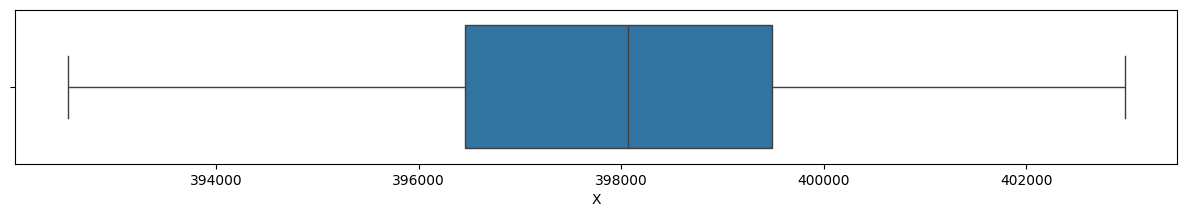

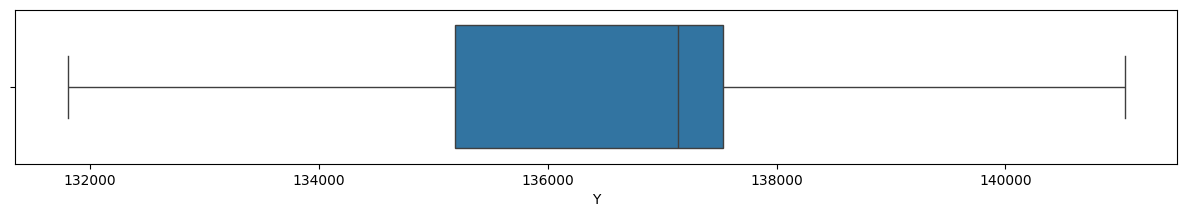

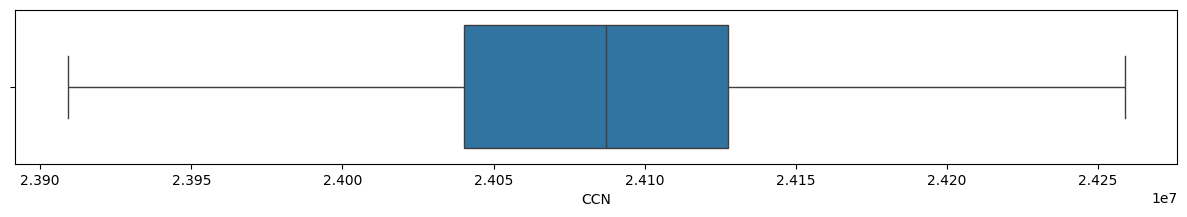

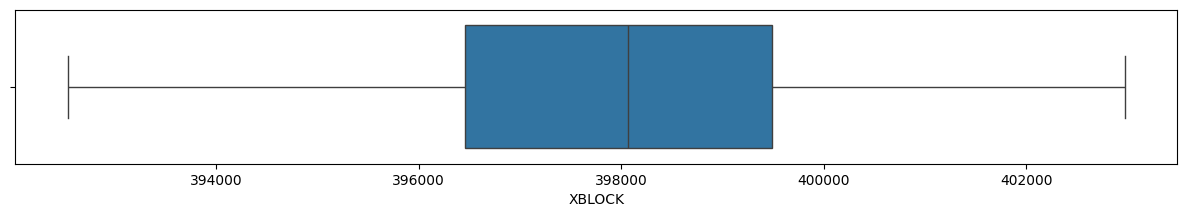

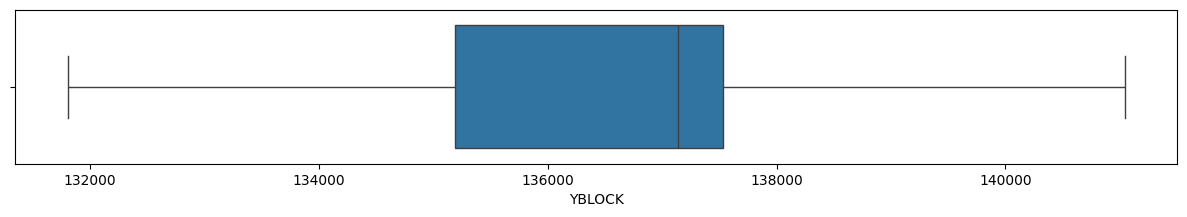

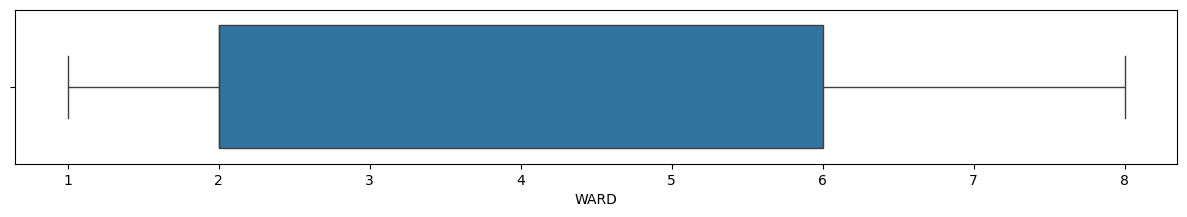

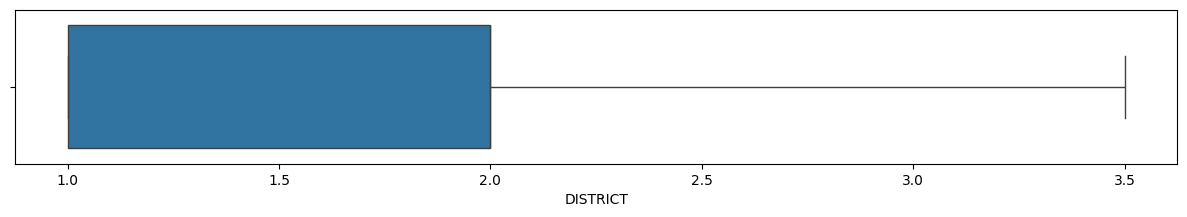

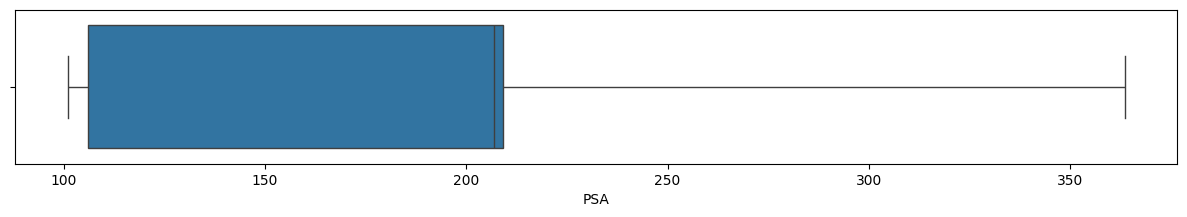

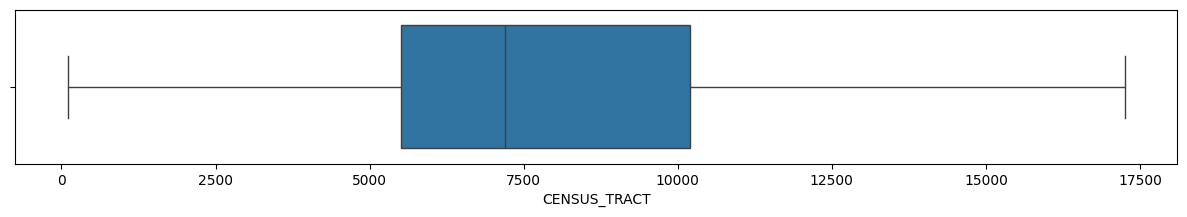

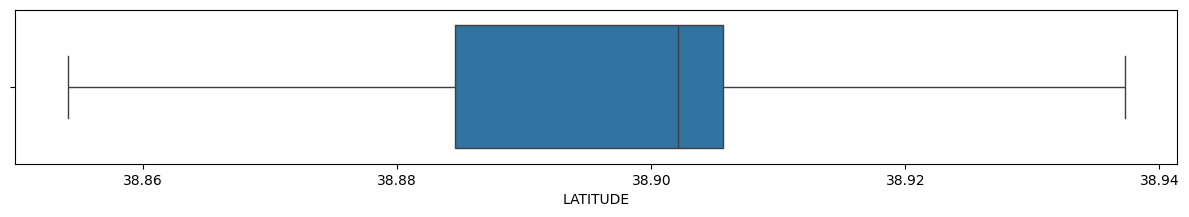

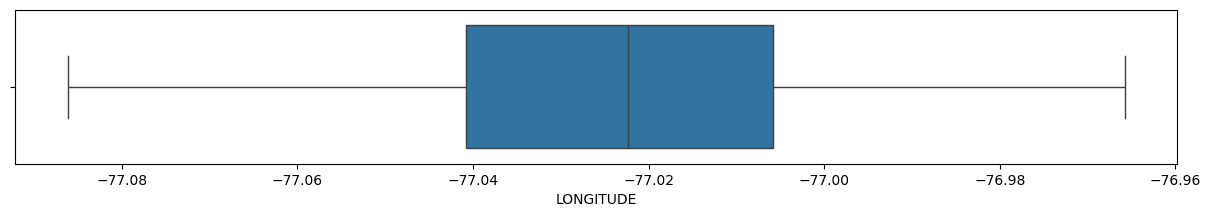

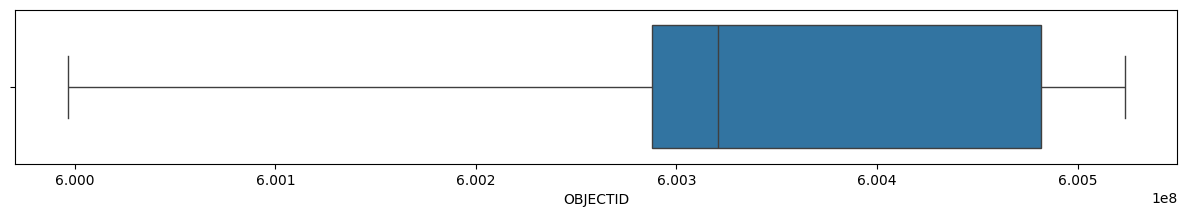

In [132]:
for column in numeric_cols:
    plt.figure(figsize=(15,2))
    sns.boxplot(x=df[column])

In [108]:
# Step 2: Date-Time Processing
# Convert date columns to datetime format
df['REPORT_DAT'] = pd.to_datetime(df['REPORT_DAT'], errors='coerce')
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

# Extract additional features from the datetime columns
df['REPORT_YEAR'] = df['REPORT_DAT'].dt.year
df['REPORT_MONTH'] = df['REPORT_DAT'].dt.month
df['REPORT_DAY'] = df['REPORT_DAT'].dt.day
df['REPORT_HOUR'] = df['REPORT_DAT'].dt.hour
df['REPORT_WEEKDAY'] = df['REPORT_DAT'].dt.weekday

In [133]:
df.head()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID
1,396326.1700,139306.490000,24124362.0,2024/08/14 04:48:00+00,MIDNIGHT,OTHERS,MOTOR VEHICLE THEFT,2400 - 2499 BLOCK OF 18TH STREET NW,396326.170000,139306.490000,...,Cluster 1,004002 1,4002.0,Precinct 25,38.921623,-77.042365,ADAMS MORGAN,2024/08/11 03:30:00+00,2024/08/14 04:43:00+00,599996378.0
4,398682.3000,134716.490000,24034913.0,2024/03/07 13:11:19+00,DAY,OTHERS,MOTOR VEHICLE THEFT,700 - 899 BLOCK OF 3RD STREET SW,398682.300000,134716.490000,...,Cluster 9,010500 3,10500.0,Precinct 128,38.880281,-77.015187,SOUTHWEST,2024/03/07 10:55:00+00,2024/03/07 13:00:00+00,599996378.0
5,392672.1200,141040.892625,24037280.0,2024/03/11 23:33:41+00,EVENING,OTHERS,THEFT/OTHER,4300 - 4399 BLOCK OF MILITARY ROAD NW,392672.120000,141040.892624,...,Cluster 11,001100 2,1100.0,Precinct 32,38.937255,-77.084550,FRIENDSHIP HEIGHTS,2024/03/11 22:05:00+00,2024/03/11 22:55:00+00,599996378.0
9,394693.0201,137483.264600,24043340.0,2024/03/22 17:45:23+00,DAY,OTHERS,THEFT/OTHER,31ST STREET NW AND M STREET NW,394693.020057,137483.264637,...,Cluster 4,000102 3,102.0,Precinct 5,38.905190,-77.061184,GEORGETOWN,2024/03/10 18:00:00+00,2024/03/22 17:27:00+00,599996378.0
10,399823.2700,137184.390000,24030117.0,2024/03/01 20:32:59+00,EVENING,GUN,SEX ABUSE,K STREET NE AND 3RD STREET NE,399823.270014,137184.390013,...,Cluster 25,010602 4,10602.0,Precinct 83,38.902514,-77.002037,NOMA,2024/02/27 09:15:00+00,2024/02/27 09:30:00+00,599996378.0


In [142]:
# Step 1: Select categorical features to encode
categorical_features = ['OFFENSE', 'WARD', 'DISTRICT']

# Step 2: Apply One-Hot Encoding
df= pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Display the first few rows of the encoded DataFrame
print(data_encoded.head())

              X              Y         CCN              REPORT_DAT     SHIFT  \
1   396326.1700  139306.490000  24124362.0  2024/08/14 04:48:00+00  MIDNIGHT   
4   398682.3000  134716.490000  24034913.0  2024/03/07 13:11:19+00       DAY   
5   392672.1200  141040.892625  24037280.0  2024/03/11 23:33:41+00   EVENING   
9   394693.0201  137483.264600  24043340.0  2024/03/22 17:45:23+00       DAY   
10  399823.2700  137184.390000  24030117.0  2024/03/01 20:32:59+00   EVENING   

    METHOD                                  BLOCK         XBLOCK  \
1   OTHERS    2400 - 2499 BLOCK OF 18TH STREET NW  396326.170000   
4   OTHERS       700 - 899 BLOCK OF 3RD STREET SW  398682.300000   
5   OTHERS  4300 - 4399 BLOCK OF MILITARY ROAD NW  392672.120000   
9   OTHERS         31ST STREET NW AND M STREET NW  394693.020057   
10     GUN          K STREET NE AND 3RD STREET NE  399823.270014   

           YBLOCK ANC  ...  OFFENSE_THEFT F/AUTO OFFENSE_THEFT/OTHER WARD_2.0  \
1   139306.490000  1C  ...   

In [143]:
df.head(20)

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,BLOCK,XBLOCK,YBLOCK,ANC,...,OFFENSE_THEFT F/AUTO,OFFENSE_THEFT/OTHER,WARD_2.0,WARD_3.0,WARD_5.0,WARD_6.0,WARD_8.0,DISTRICT_2.0,DISTRICT_3.0,DISTRICT_3.5
1,396326.1700,139306.490000,24124362.0,2024/08/14 04:48:00+00,MIDNIGHT,OTHERS,2400 - 2499 BLOCK OF 18TH STREET NW,396326.170000,139306.490000,1C,...,False,False,False,False,False,False,False,False,True,False
4,398682.3000,134716.490000,24034913.0,2024/03/07 13:11:19+00,DAY,OTHERS,700 - 899 BLOCK OF 3RD STREET SW,398682.300000,134716.490000,6D,...,False,False,False,False,False,True,False,False,False,False
5,392672.1200,141040.892625,24037280.0,2024/03/11 23:33:41+00,EVENING,OTHERS,4300 - 4399 BLOCK OF MILITARY ROAD NW,392672.120000,141040.892624,3E,...,False,True,False,True,False,False,False,True,False,False
9,394693.0201,137483.264600,24043340.0,2024/03/22 17:45:23+00,DAY,OTHERS,31ST STREET NW AND M STREET NW,394693.020057,137483.264637,2E,...,False,True,True,False,False,False,False,True,False,False
10,399823.2700,137184.390000,24030117.0,2024/03/01 20:32:59+00,EVENING,GUN,K STREET NE AND 3RD STREET NE,399823.270014,137184.390013,6C,...,False,False,False,False,False,True,False,False,False,True
12,396635.7000,139697.820000,24034620.0,2024/03/06 21:01:20+00,EVENING,OTHERS,1646 - 1699 BLOCK OF COLUMBIA ROAD NW,396635.700000,139697.820000,1C,...,True,False,False,False,False,False,False,False,True,False
21,396168.0300,137321.600000,24035303.0,2024/03/08 02:40:18+00,EVENING,OTHERS,1900 - 1999 BLOCK OF L STREET NW,396168.030000,137321.600000,2C,...,False,True,True,False,False,False,False,True,False,False
29,399351.5400,137184.600000,24042247.0,2024/03/21 10:30:04+00,MIDNIGHT,OTHERS,1 - 99 BLOCK OF K STREET NE,399351.540000,137184.600000,6E,...,False,True,False,False,False,True,False,False,False,False
32,398532.8000,137052.350000,24117897.0,2024/08/01 21:31:47+00,EVENING,OTHERS,400 - 448 BLOCK OF I STREET NW,398532.800000,137052.350000,6E,...,False,True,False,False,False,True,False,False,False,False
33,398098.8500,136808.920000,24034689.0,2024/03/07 02:58:14+00,EVENING,OTHERS,700 - 799 BLOCK OF 7TH STREET NW,398098.850000,136808.920000,2C,...,False,True,True,False,False,False,False,False,False,False


In [144]:

# Step 4: Geo-Location Data Processing
# Check for any missing or out-of-bound coordinates in 'LATITUDE' and 'LONGITUDE'
df = df[(df['LATITUDE'].notnull()) & (df['LONGITUDE'].notnull())]
df = df[(df['LATITUDE'].between(-90, 90)) & (df['LONGITUDE'].between(-180, 180))]

In [145]:
df.head(20)

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,BLOCK,XBLOCK,YBLOCK,ANC,...,OFFENSE_THEFT F/AUTO,OFFENSE_THEFT/OTHER,WARD_2.0,WARD_3.0,WARD_5.0,WARD_6.0,WARD_8.0,DISTRICT_2.0,DISTRICT_3.0,DISTRICT_3.5
1,396326.1700,139306.490000,24124362.0,2024/08/14 04:48:00+00,MIDNIGHT,OTHERS,2400 - 2499 BLOCK OF 18TH STREET NW,396326.170000,139306.490000,1C,...,False,False,False,False,False,False,False,False,True,False
4,398682.3000,134716.490000,24034913.0,2024/03/07 13:11:19+00,DAY,OTHERS,700 - 899 BLOCK OF 3RD STREET SW,398682.300000,134716.490000,6D,...,False,False,False,False,False,True,False,False,False,False
5,392672.1200,141040.892625,24037280.0,2024/03/11 23:33:41+00,EVENING,OTHERS,4300 - 4399 BLOCK OF MILITARY ROAD NW,392672.120000,141040.892624,3E,...,False,True,False,True,False,False,False,True,False,False
9,394693.0201,137483.264600,24043340.0,2024/03/22 17:45:23+00,DAY,OTHERS,31ST STREET NW AND M STREET NW,394693.020057,137483.264637,2E,...,False,True,True,False,False,False,False,True,False,False
10,399823.2700,137184.390000,24030117.0,2024/03/01 20:32:59+00,EVENING,GUN,K STREET NE AND 3RD STREET NE,399823.270014,137184.390013,6C,...,False,False,False,False,False,True,False,False,False,True
12,396635.7000,139697.820000,24034620.0,2024/03/06 21:01:20+00,EVENING,OTHERS,1646 - 1699 BLOCK OF COLUMBIA ROAD NW,396635.700000,139697.820000,1C,...,True,False,False,False,False,False,False,False,True,False
21,396168.0300,137321.600000,24035303.0,2024/03/08 02:40:18+00,EVENING,OTHERS,1900 - 1999 BLOCK OF L STREET NW,396168.030000,137321.600000,2C,...,False,True,True,False,False,False,False,True,False,False
29,399351.5400,137184.600000,24042247.0,2024/03/21 10:30:04+00,MIDNIGHT,OTHERS,1 - 99 BLOCK OF K STREET NE,399351.540000,137184.600000,6E,...,False,True,False,False,False,True,False,False,False,False
32,398532.8000,137052.350000,24117897.0,2024/08/01 21:31:47+00,EVENING,OTHERS,400 - 448 BLOCK OF I STREET NW,398532.800000,137052.350000,6E,...,False,True,False,False,False,True,False,False,False,False
33,398098.8500,136808.920000,24034689.0,2024/03/07 02:58:14+00,EVENING,OTHERS,700 - 799 BLOCK OF 7TH STREET NW,398098.850000,136808.920000,2C,...,False,True,True,False,False,False,False,False,False,False


In [146]:
# Step 5: Drop Irrelevant or Duplicate Columns
# Drop columns that are not useful for analysis
df.drop(columns=['OBJECTID', 'CCN', 'BLOCK', 'X', 'Y', 'XBLOCK', 'YBLOCK'], inplace=True)

In [148]:
df.head()



,REPORT_DAT,SHIFT,METHOD,ANC,PSA,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,...,OFFENSE_THEFT F/AUTO,OFFENSE_THEFT/OTHER,WARD_2.0,WARD_3.0,WARD_5.0,WARD_6.0,WARD_8.0,DISTRICT_2.0,DISTRICT_3.0,DISTRICT_3.5
1,2024/08/14 04:48:00+00,MIDNIGHT,OTHERS,1C,303.0,Cluster 1,004002 1,4002.0,Precinct 25,38.921623,...,False,False,False,False,False,False,False,False,True,False
4,2024/03/07 13:11:19+00,DAY,OTHERS,6D,103.0,Cluster 9,010500 3,10500.0,Precinct 128,38.880281,...,False,False,False,False,False,True,False,False,False,False
5,2024/03/11 23:33:41+00,EVENING,OTHERS,3E,202.0,Cluster 11,001100 2,1100.0,Precinct 32,38.937255,...,False,True,False,True,False,False,False,True,False,False
9,2024/03/22 17:45:23+00,DAY,OTHERS,2E,206.0,Cluster 4,000102 3,102.0,Precinct 5,38.905190,...,False,True,True,False,False,False,False,True,False,False
10,2024/03/01 20:32:59+00,EVENING,GUN,6C,363.5,Cluster 25,010602 4,10602.0,Precinct 83,38.902514,...,False,False,False,False,False,True,False,False,False,True


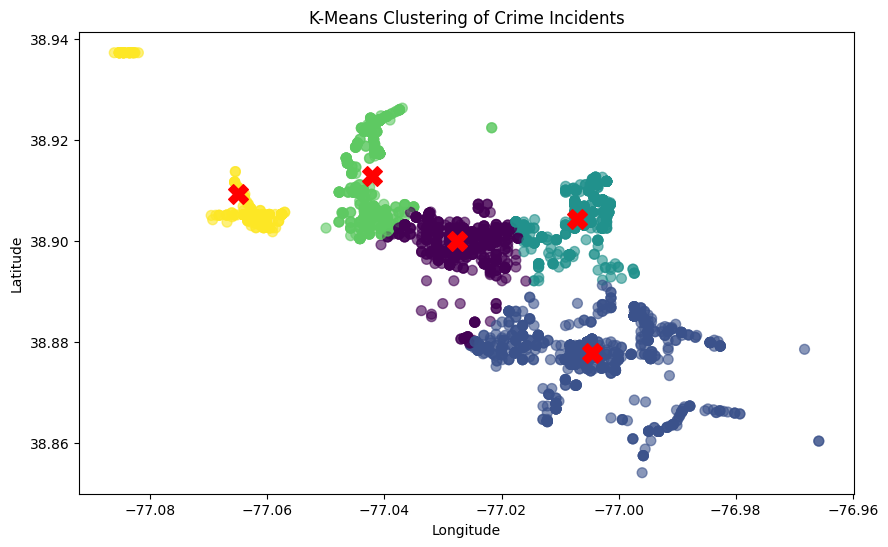

In [150]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'LATITUDE' and 'LONGITUDE' are the features for clustering
features = df[['LATITUDE', 'LONGITUDE']]  # Create features DataFrame from df

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(features)

# Add cluster labels to the dataset
df['CLUSTER'] = kmeans.labels_  # Now, the lengths should match

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(features['LONGITUDE'], features['LATITUDE'], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=200, c='red', marker='X')
plt.title('K-Means Clustering of Crime Incidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [151]:
df.head()

,REPORT_DAT,SHIFT,METHOD,ANC,PSA,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,...,OFFENSE_THEFT/OTHER,WARD_2.0,WARD_3.0,WARD_5.0,WARD_6.0,WARD_8.0,DISTRICT_2.0,DISTRICT_3.0,DISTRICT_3.5,CLUSTER
1,2024/08/14 04:48:00+00,MIDNIGHT,OTHERS,1C,303.0,Cluster 1,004002 1,4002.0,Precinct 25,38.921623,...,False,False,False,False,False,False,False,True,False,3
4,2024/03/07 13:11:19+00,DAY,OTHERS,6D,103.0,Cluster 9,010500 3,10500.0,Precinct 128,38.880281,...,False,False,False,False,True,False,False,False,False,1
5,2024/03/11 23:33:41+00,EVENING,OTHERS,3E,202.0,Cluster 11,001100 2,1100.0,Precinct 32,38.937255,...,True,False,True,False,False,False,True,False,False,4
9,2024/03/22 17:45:23+00,DAY,OTHERS,2E,206.0,Cluster 4,000102 3,102.0,Precinct 5,38.905190,...,True,True,False,False,False,False,True,False,False,4
10,2024/03/01 20:32:59+00,EVENING,GUN,6C,363.5,Cluster 25,010602 4,10602.0,Precinct 83,38.902514,...,False,False,False,False,True,False,False,False,True,2
